<a href="https://colab.research.google.com/github/Sercan1111/ImageClassificationUsingCNN/blob/main/ImageClassificationUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip list


Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [ ]:
import tensorflow as tf
import os #used to naviage the file structure

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
# use it for big models and with the for loop so basically use as amount of you need , not more

In [ ]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Remove dodgy images


In [ ]:
import cv2 ## opencv upload
import imghdr ##

In [ ]:
data_dir = '/content/drive/MyDrive/Colab_Notebooks/imageclassifierdataset'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png'] ## Possible image extensions

In [ ]:
for image_class in os.listdir(data_dir): ##
    for image in os.listdir(os.path.join(data_dir, image_class)): ## we check if  there is any weird image for each image
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)# open the image etc.
            tip = imghdr.what(image_path) #
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the Data

In [ ]:

import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab_Notebooks/imageclassifierdataset') #where we load the data , it also preprocess the images like batch size etc.


Found 305 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator() ##mesela ilk indexi falan alamıyoruz bunun için numpy iterator kullanıyoruz

In [ ]:
 #get another batch from iterator

batch = data_iterator.next() ## grabbing one batch
batch[0].shape

(32, 256, 256, 3)

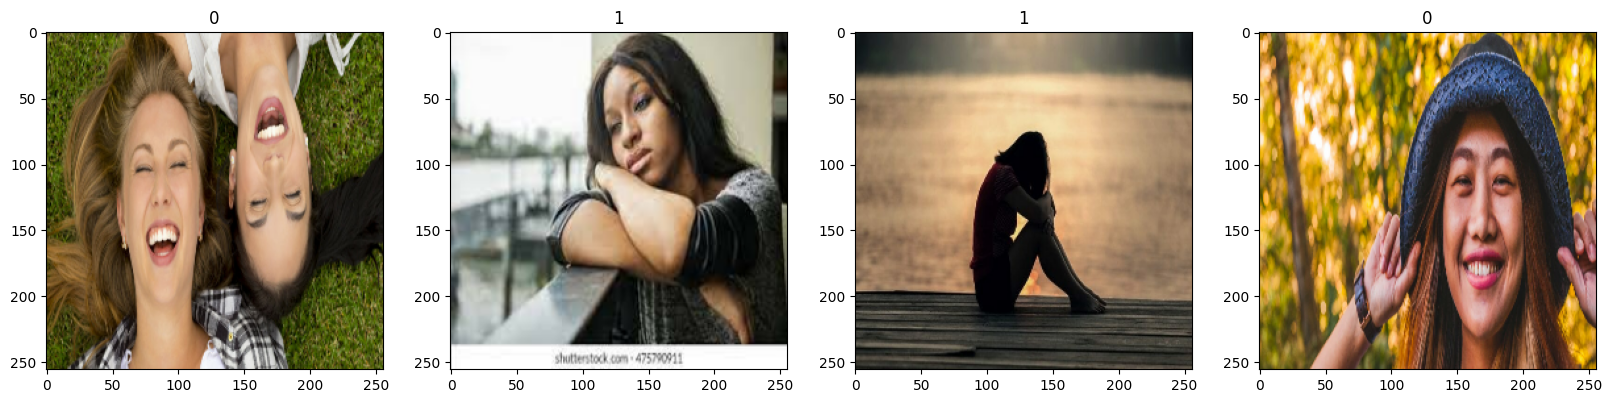

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx]) ## hangi imagenin hangi numaraya assign ettiğimize bakıyoruz

## Preprocessing

## Scale **Data**

In [ ]:
data = data.map(lambda x,y: (x/255, y))  ## when we pre-fetch the data , it will do the transofrmation also
# x represents images, y represents labels


In [ ]:
data.as_numpy_iterator().next()## we take a look on next batch


(array([[[[0.9019608 , 0.8352941 , 0.7254902 ],
          [0.9022978 , 0.83563113, 0.7258272 ],
          [0.90382963, 0.837163  , 0.72735906],
          ...,
          [0.9137255 , 0.84705883, 0.7372549 ],
          [0.9137255 , 0.84705883, 0.7372549 ],
          [0.9137255 , 0.84705883, 0.7372549 ]],
 
         [[0.9019608 , 0.8352941 , 0.7254902 ],
          [0.9022978 , 0.83563113, 0.7258272 ],
          [0.90382963, 0.837163  , 0.72735906],
          ...,
          [0.9137255 , 0.84705883, 0.7372549 ],
          [0.9137255 , 0.84705883, 0.7372549 ],
          [0.9137255 , 0.84705883, 0.7372549 ]],
 
         [[0.9019608 , 0.8352941 , 0.7254902 ],
          [0.9022978 , 0.83563113, 0.7258272 ],
          [0.90382963, 0.837163  , 0.72735906],
          ...,
          [0.9137255 , 0.84705883, 0.7372549 ],
          [0.9137255 , 0.84705883, 0.7372549 ],
          [0.9137255 , 0.84705883, 0.7372549 ]],
 
         ...,
 
         [[0.7019608 , 0.36078432, 0.3254902 ],
          [0.70499

## Split the Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size


7

In [ ]:

train = data.take(train_size)  #if dataset haven't shuffled shuffle it first but ours is already suffled
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Build the Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()


In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# 1 burada bir piksl her seferinde , 16 number of filters  3.3 ise size of filter

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Train

In [ ]:
logdir='logs'


In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
7/7 [==============================] - 14s 756ms/step - loss: 0.7922 - accuracy: 0.5179 - val_loss: 0.6445 - val_accuracy: 0.5781
Epoch 2/20
7/7 [==============================] - 7s 554ms/step - loss: 0.6510 - accuracy: 0.5759 - val_loss: 0.5937 - val_accuracy: 0.7812
Epoch 3/20
7/7 [==============================] - 8s 906ms/step - loss: 0.6347 - accuracy: 0.5580 - val_loss: 0.6155 - val_accuracy: 0.6719
Epoch 4/20
7/7 [==============================] - 8s 905ms/step - loss: 0.5718 - accuracy: 0.8304 - val_loss: 0.4742 - val_accuracy: 0.8594
Epoch 5/20
7/7 [==============================] - 7s 555ms/step - loss: 0.4791 - accuracy: 0.7991 - val_loss: 0.4351 - val_accuracy: 0.7969
Epoch 6/20
7/7 [==============================] - 8s 906ms/step - loss: 0.3885 - accuracy: 0.8259 - val_loss: 0.3412 - val_accuracy: 0.8750
Epoch 7/20
7/7 [==============================] - 8s 906ms/step - loss: 0.2706 - accuracy: 0.9152 - val_loss: 0.1984 - val_accuracy: 0.9062
Epoch 8/20
7/7 [===

##Plot Performance

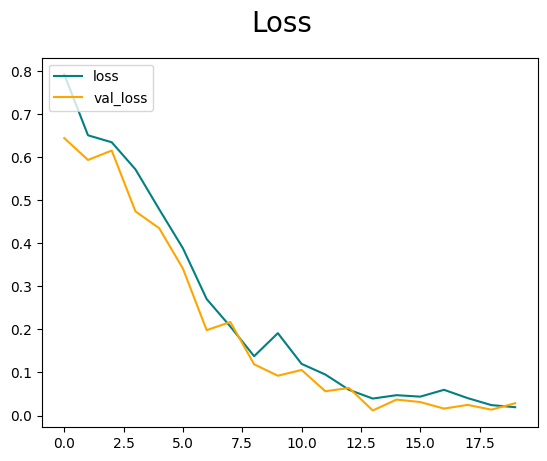

In [ ]:

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

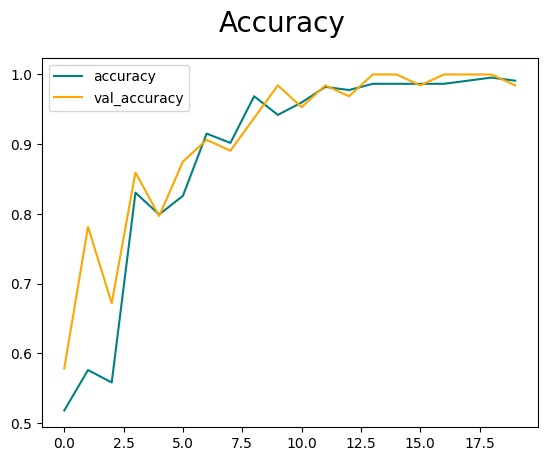

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaulate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [ ]:

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 30ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


##Test


In [ ]:
import cv2


TypeError: Image data of dtype object cannot be converted to float

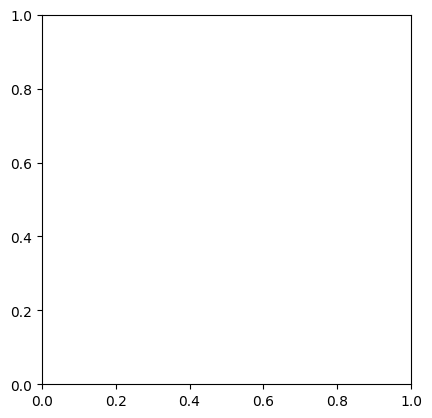

In [ ]:

img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

In [ ]:

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))


In [ ]:
yhat

In [ ]:

if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')